통계 파일로부터 저장된 csv 파일 불러다가 플롯 그리는 역할.

In [1]:
# 사전 변수
csv_dir = '/home/hschoi/leehyunwon/ECG-SNN/new_server/ver6/statistics/tensorboard_to_pandas/window.csv'
savefile_name = 'window_boxplot_regression_2.pdf'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



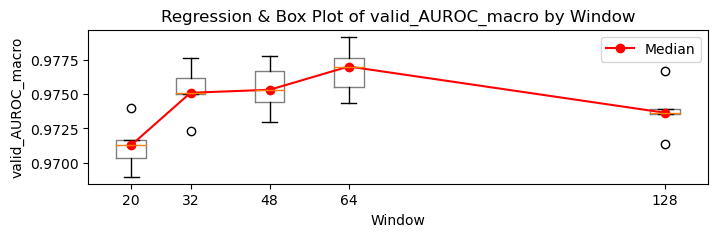

In [6]:
# CSV 파일 불러오기
data = pd.read_csv(csv_dir)

# 1. 폴더명에서 'win_xx' 추출하여 x축 값 추가
def extract_win(source_dir):
    if "win" in source_dir:
        win_value = int(source_dir.split("win")[1].split("_")[0])
        return win_value
    return 32

data['win'] = data['source_dir'].apply(extract_win)

# 2. 폴더명에서 시간 기록(yyyy-mm-dd-hh-mm-ss)을 추출하여 그룹화 키 추가
def extract_time_key(source_dir):
    return "-".join(source_dir.split("_")[:-2])

data['time_key'] = data['source_dir'].apply(extract_time_key)

# 128 제외
# data = data[data['win'] != 128]



# 플롯그리기

metrics = ["valid_AUROC_macro"]

for metric in metrics:
    plt.figure(figsize=(8, 2))

    unique_wins = sorted(data['win'].unique())
    boxplot_data = [data[data['win'] == win][metric] for win in unique_wins]

    # 박스플롯
    bp = plt.boxplot(
        boxplot_data,
        positions=unique_wins,
        widths=np.min(np.diff(unique_wins)) * 0.5,
        boxprops=dict(alpha=0.5)
    )

    # 박스플롯의 중앙값 리스트 추출
    medians = [line.get_ydata()[0] for line in bp['medians']]  # 각 median 선의 y값 (중앙값)

    # 꺾은선그래프 (median 값 연결)
    plt.plot(unique_wins, medians, marker='o', linestyle='-', color='red', label='Median')

    # 라벨 및 타이틀
    plt.xlabel("Window")
    plt.ylabel(metric)
    plt.title(f"Regression & Box Plot of {metric} by Window")
    plt.legend()

    plt.savefig(savefile_name, format="pdf", bbox_inches="tight")
    plt.show()

plt.close()
